<a href="https://colab.research.google.com/github/prasadanvekar/elvtrdocs/blob/main/Bonus_Assignment_10_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install yellowbrick to visualize elbow plot
!pip install yellowbrick

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  

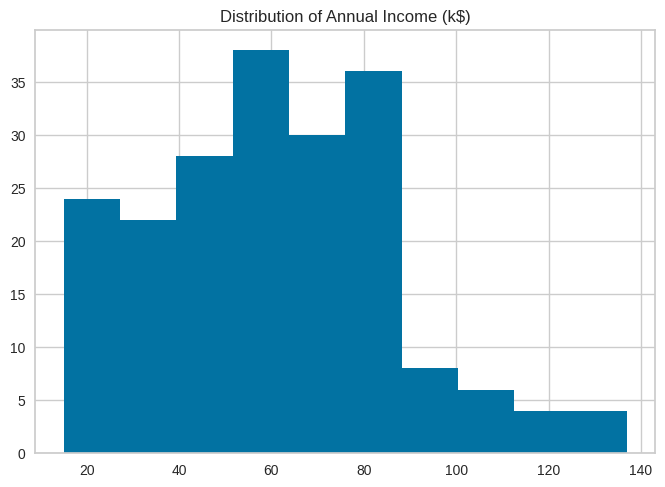

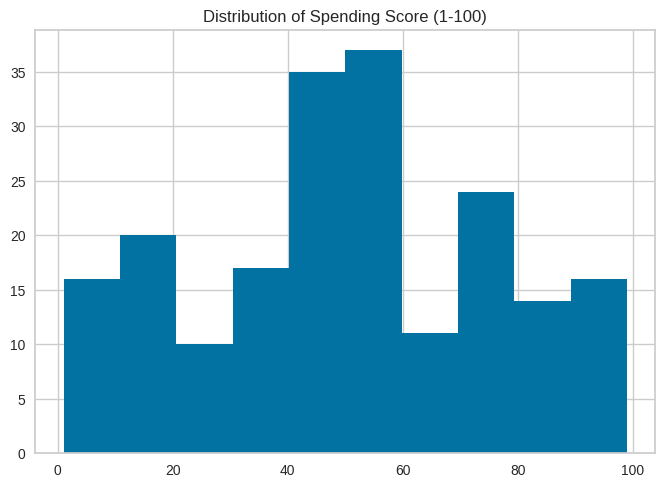

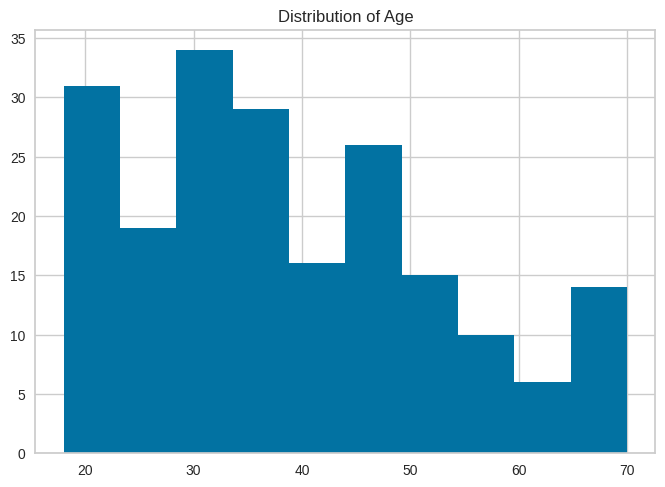

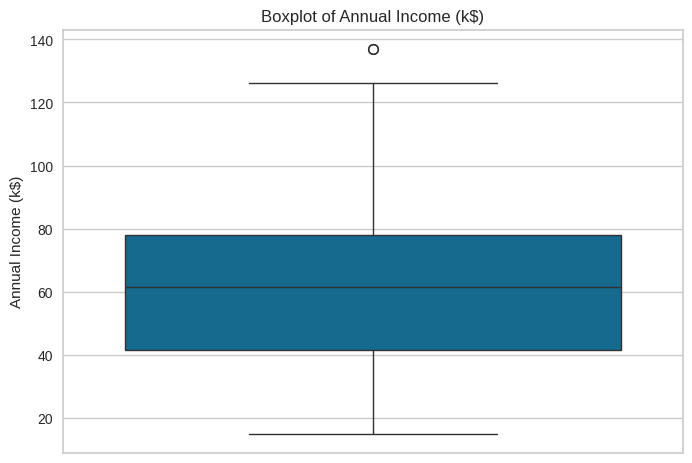

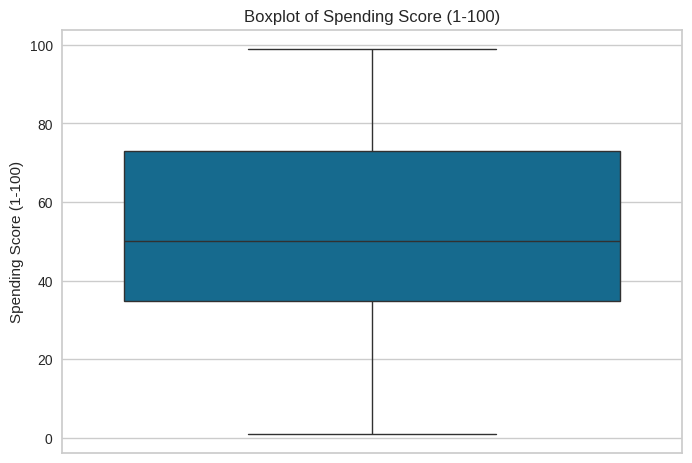

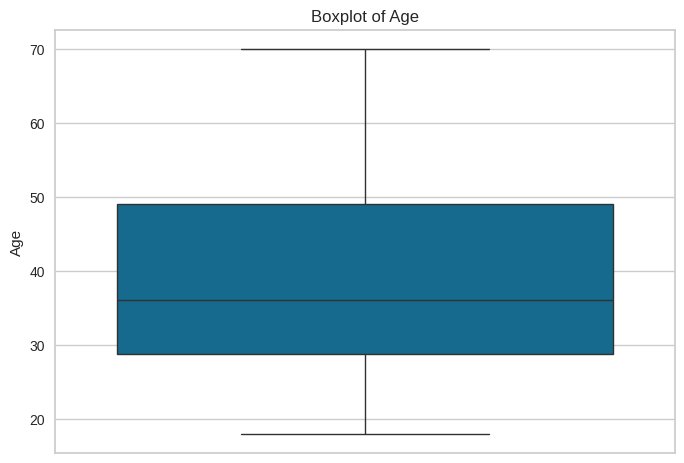

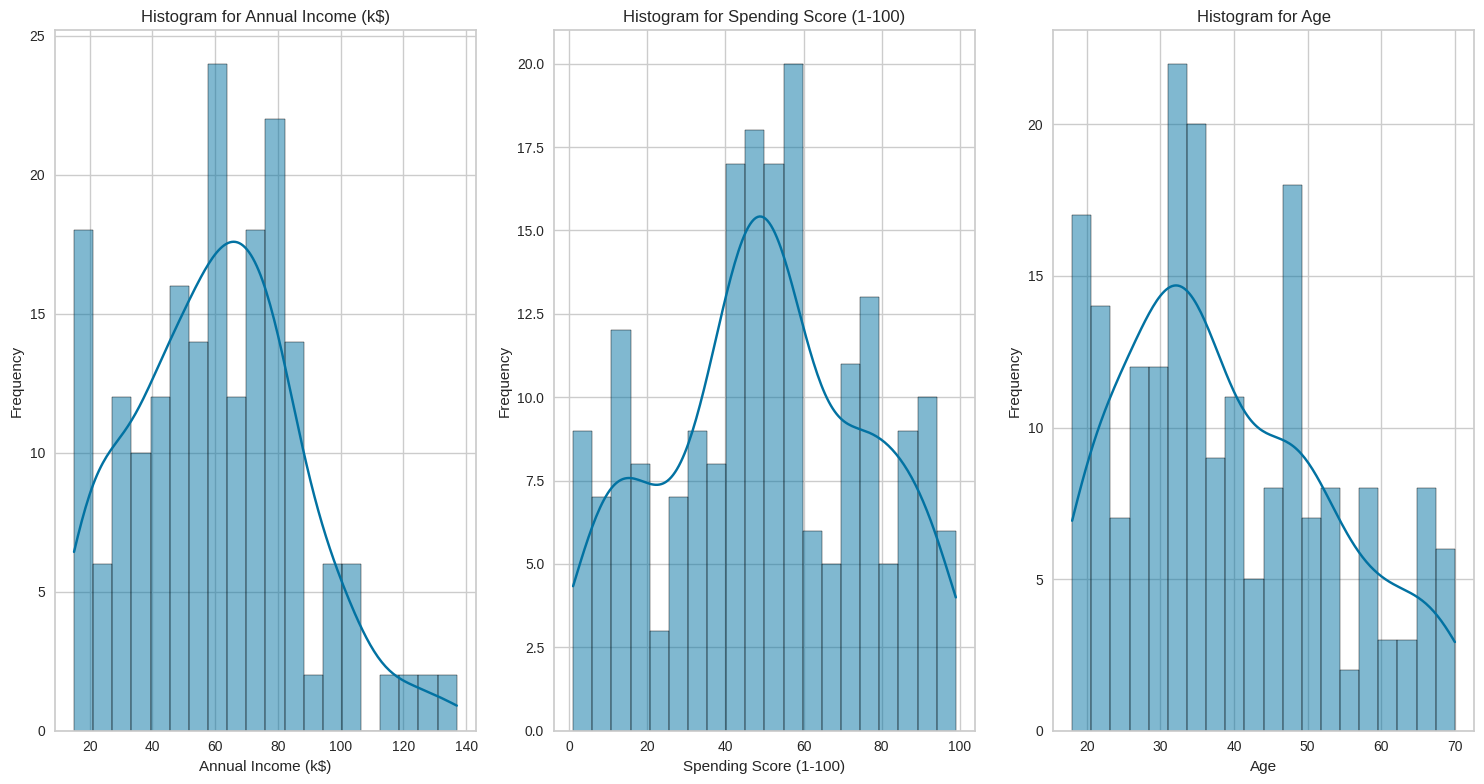

Correlation Matrix for Numeric Variables:
                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


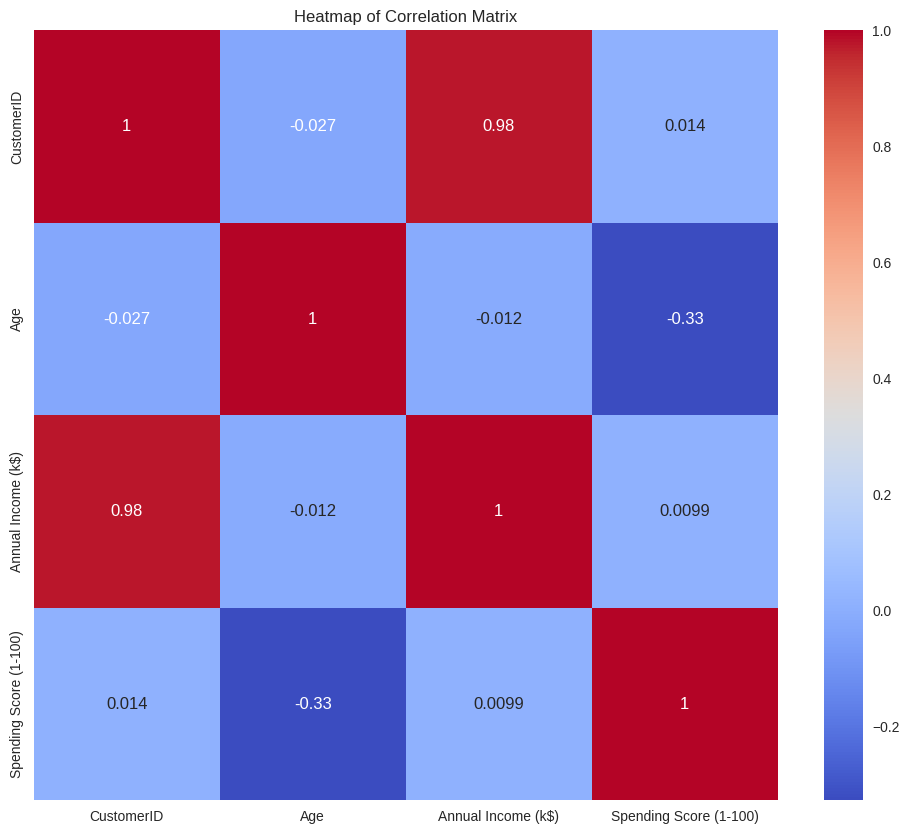

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

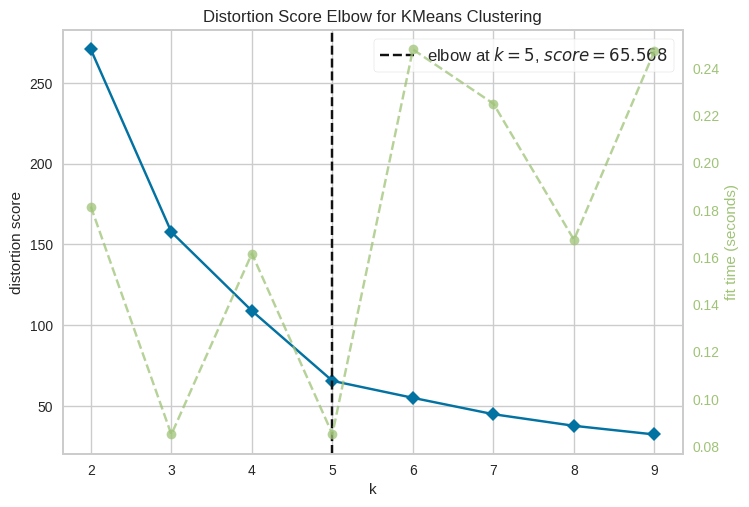

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


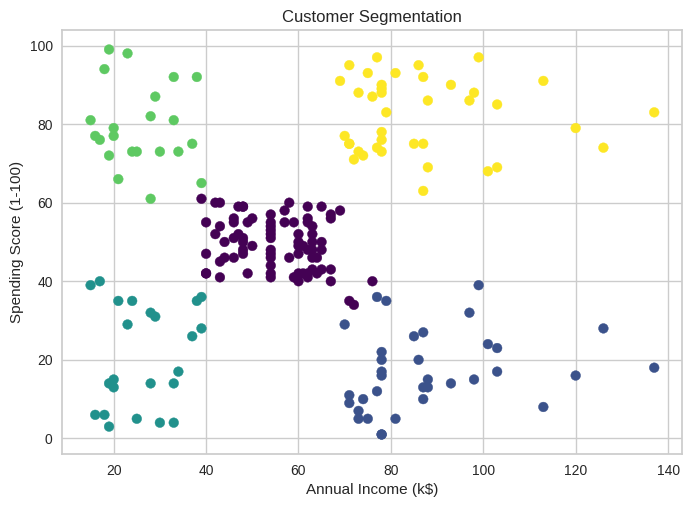

           0          1
0  55.296296  49.518519
1  88.200000  17.114286
2  26.304348  20.913043
3  25.727273  79.363636
4  86.538462  82.128205


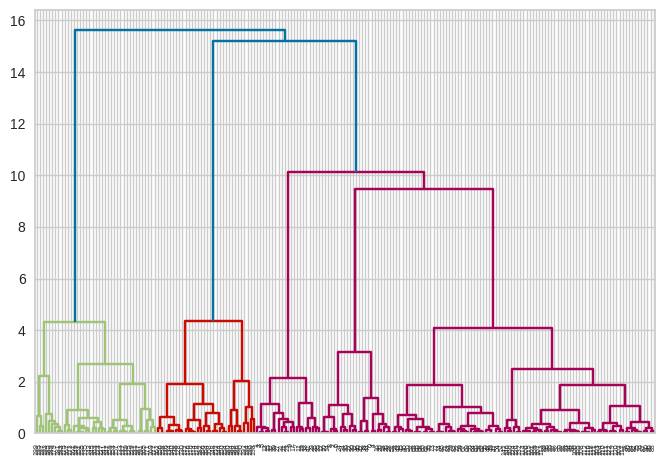

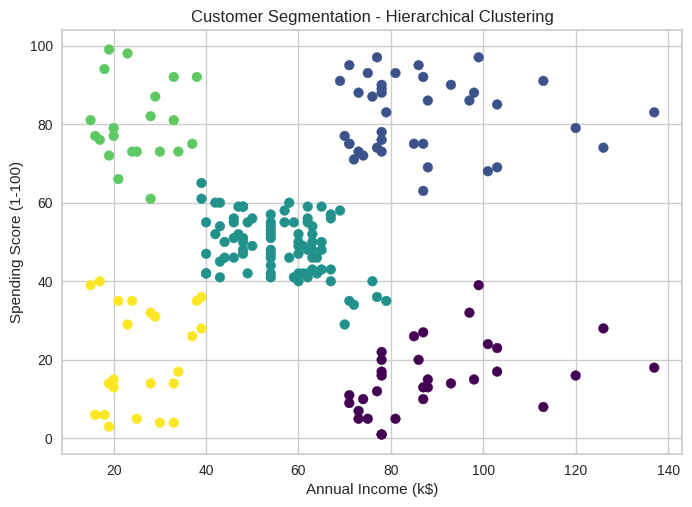

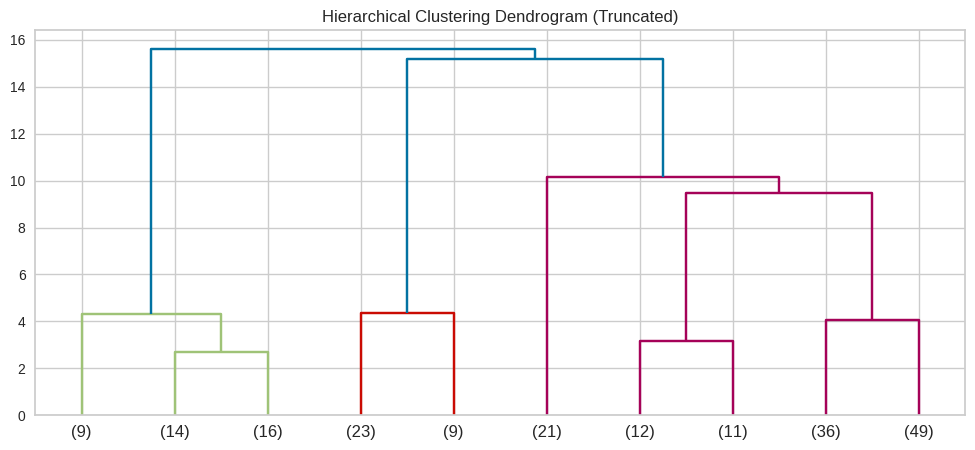

Metrics for KMeans Clustering:
Silhouette Score: 0.5546571631111091
Adjusted Rand Index: 0.9419606318143182
Mutual Information: 1.3894928304124785
Homogeneity: 0.9379665154390859
Completeness: 0.9510419321635281
V-Measure: 0.9444589708214342

Metrics for Hierarchical Clustering:
Silhouette Score: 0.5538089226688662
Adjusted Rand Index: 0.9419606318143182
Mutual Information: 1.3894928304124785
Homogeneity: 0.9510419321635281
Completeness: 0.9379665154390859
V-Measure: 0.9444589708214342

Metrics for DBSCAN Clustering:
Silhouette Score: 0.35044619989666004
Adjusted Rand Index: 0.28437420060566243
Mutual Information: 0.49903488810850827
Homogeneity: 0.7999907319314615
Completeness: 0.3415657093119633
V-Measure: 0.4787313038986195



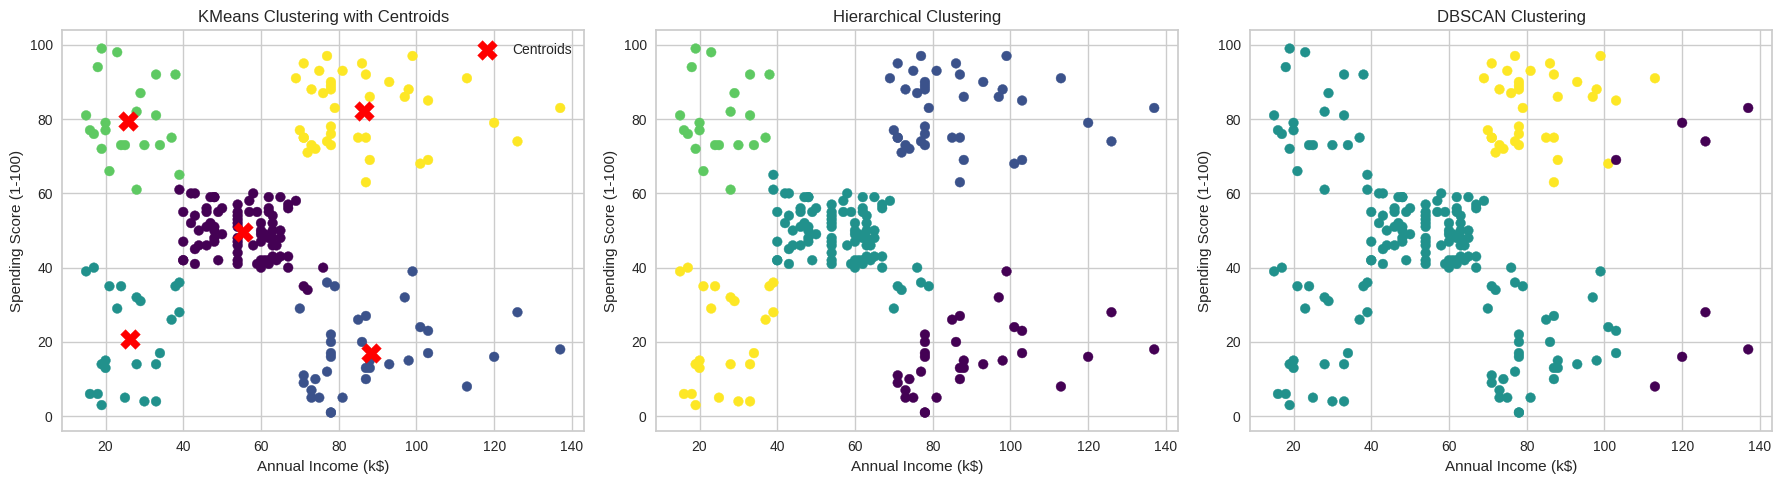

Number of Noise Points: 8


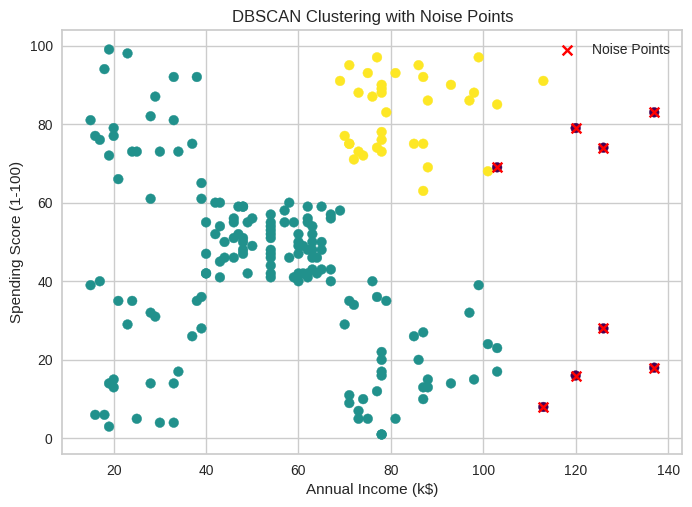

Cluster Sizes:
 0    157
 1     35
-1      8
Name: Cluster_DBSCAN, dtype: int64


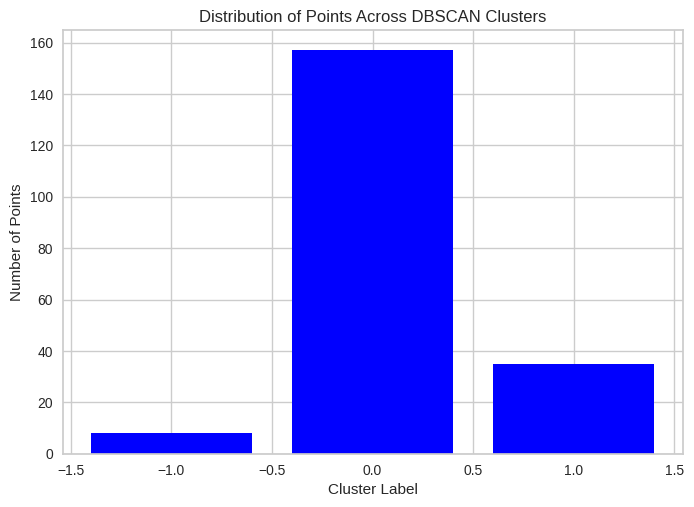

Cluster Densities:
 0    0.817708
 1    0.182292
-1    0.041667
Name: Cluster_DBSCAN, dtype: float64


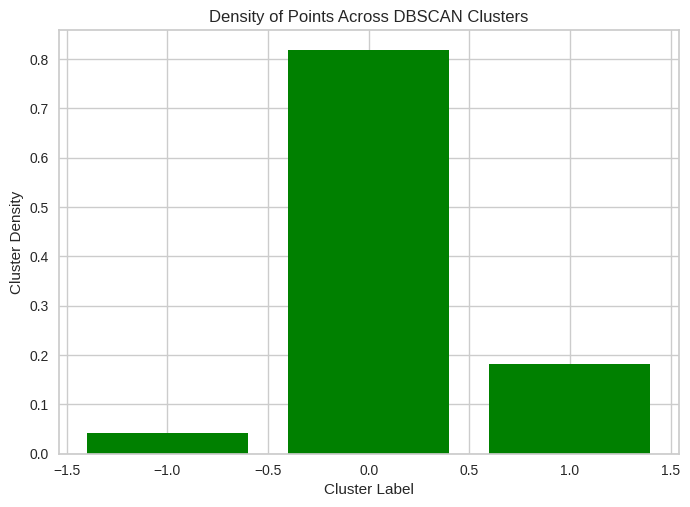

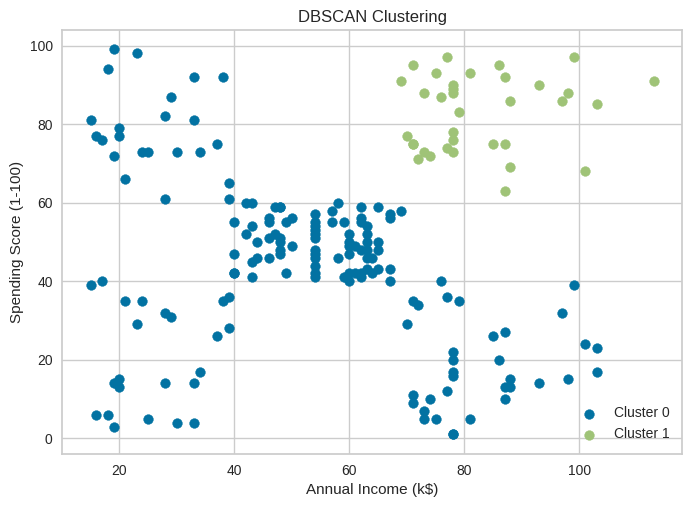

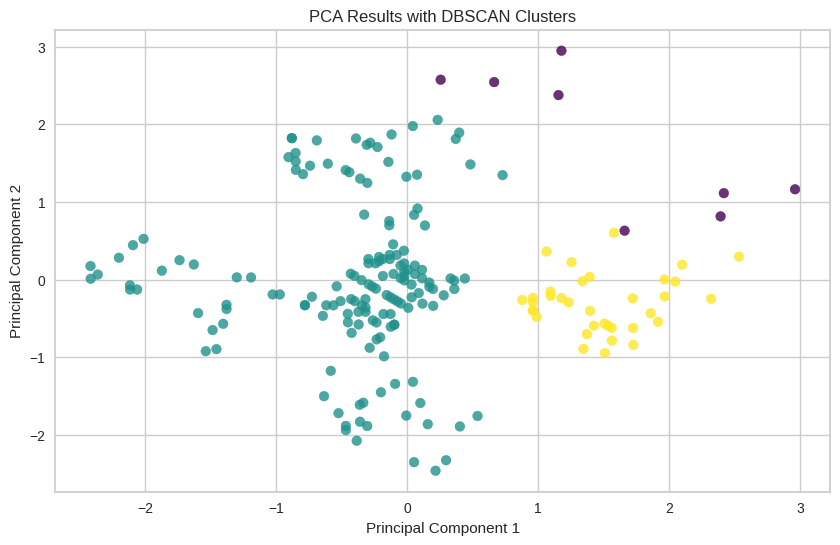

In [2]:
###############################################################################################
# Assignment#10:Customer Segmentation                                                          #
# Objective : Implement Customer Segemention Technique for the given dataset                  #
# Author: Prasad S Anvekar                                                                    #
# Date: 26 Jan 2024                                                                           #
###############################################################################################

# Importing the required libraries

import os
import pandas as pd
import sklearn as sk
import json
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import adjusted_rand_score, mutual_info_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Data Path where the file are located.
# File will have to be uploaded to required folder/directory before running the code.

DATA_PATH = "Mall_Customers.csv"

# Error Hanlding for Data Path and File not found scenarios.

if os.path.exists(DATA_PATH):
    # Read from file if we've already downloaded the data.
    with open(DATA_PATH) as f:
        data = pd.read_csv('Mall_Customers.csv', low_memory=False)
else:
     print("File not found!")

#################################################################
#Data exploration, analysis & Preprocessing
#Background: Understanding the dataset's structure and key characteristics.

#################################################################
# understanding the data
# Review the Data Structure

print(data.info())

# Review the sample data
print(data.head())
print(data.describe())

#check for any missing values
missing_values = data.isnull().sum()
print(missing_values)

# Visualize the Data Distribution
numeric_columns = ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']

for column in numeric_columns:

    plt.hist(data[column])
    plt.title(f"Distribution of {column}")
    plt.show()

# Review Outliers
for column in numeric_columns:

    sns.boxplot(data[column])
    plt.title(f"Boxplot of {column}")
    plt.show()


# Data Exploration: Distributions for Numeric Variables
numeric_columns = ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']
plt.figure(figsize=(15, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)  # Fix the subplot call
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Statistical Analysis on data
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
print("Correlation Matrix for Numeric Variables:")
print(corr_matrix)

# Heatmap for the correlation matrix on data
plt.figure(figsize=(12, 10))
# Selecting a subset of the correlation matrix for better visualization
sns.heatmap(corr_matrix.iloc[:10, :10], annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

#################################################################
#Enhanced Clustering with K-Means
#Background: Application of K-Means clustering to the standardized data.
#################################################################
# Select relevant features for clustering
selected_features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_features)

# Identify the optimized cluster parameter using Elbow Visualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(scaled_data)
visualizer.show()


# Apply KMeans clustering
num_clusters = 5  # Adjusted based on the KElbow visualizer
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters (for two features)
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Display the cluster centers (in the standardized feature space)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers)
print(cluster_centers_df)


#################################################################
#Advanced Implementation of Hierarchical Clustering
#Background: Applying and interpreting Hierarchical Clustering.
#################################################################
# Prepare for Hierarchical Clustering
Z = linkage(scaled_data, 'ward')
dendrogram(Z)
plt.show()

# Apply Hierarchical Clustering
num_clusters_hierarchical = 5  # Adjusted based on dendrogram
hierarchical = AgglomerativeClustering(n_clusters=num_clusters_hierarchical)
data['Cluster_Hierarchical'] = hierarchical.fit_predict(scaled_data)

# Visualize the clusters for Hierarchical Clustering
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster_Hierarchical'], cmap='viridis')
plt.title('Customer Segmentation - Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Evaluate Linkage Method for Hierarchical Clustering
plt.figure(figsize=(12, 5))
dendrogram(Z, truncate_mode='lastp', p=10, show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.show()

#################################################################
#Advanced Implementation of DBSCAN
#Background: Applying and interpreting DBSCAN.
#################################################################
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['Cluster_DBSCAN'] = dbscan.fit_predict(scaled_data)

#################################################################
#Comprehensive Cluster Analysis
#Background: Deeper evaluation of the clustering results.

#################################################################
# Comprehensive Cluster Analysis

# Calculate various cluster quality metrics for KMeans
silhouette_kmeans = silhouette_score(scaled_data, data['Cluster'])
ari_kmeans = adjusted_rand_score(data['Cluster'], data['Cluster_Hierarchical'])
mi_kmeans = mutual_info_score(data['Cluster'], data['Cluster_Hierarchical'])
homogeneity_kmeans = homogeneity_score(data['Cluster'], data['Cluster_Hierarchical'])
completeness_kmeans = completeness_score(data['Cluster'], data['Cluster_Hierarchical'])
v_measure_kmeans = v_measure_score(data['Cluster'], data['Cluster_Hierarchical'])

print("Metrics for KMeans Clustering:")
print(f"Silhouette Score: {silhouette_kmeans}")
print(f"Adjusted Rand Index: {ari_kmeans}")
print(f"Mutual Information: {mi_kmeans}")
print(f"Homogeneity: {homogeneity_kmeans}")
print(f"Completeness: {completeness_kmeans}")
print(f"V-Measure: {v_measure_kmeans}\n")

# Calculate various cluster quality metrics for Hierarchical Clustering
silhouette_hierarchical = silhouette_score(scaled_data, data['Cluster_Hierarchical'])
ari_hierarchical = adjusted_rand_score(data['Cluster_Hierarchical'], data['Cluster'])
mi_hierarchical = mutual_info_score(data['Cluster_Hierarchical'], data['Cluster'])
homogeneity_hierarchical = homogeneity_score(data['Cluster_Hierarchical'], data['Cluster'])
completeness_hierarchical = completeness_score(data['Cluster_Hierarchical'], data['Cluster'])
v_measure_hierarchical = v_measure_score(data['Cluster_Hierarchical'], data['Cluster'])

print("Metrics for Hierarchical Clustering:")
print(f"Silhouette Score: {silhouette_hierarchical}")
print(f"Adjusted Rand Index: {ari_hierarchical}")
print(f"Mutual Information: {mi_hierarchical}")
print(f"Homogeneity: {homogeneity_hierarchical}")
print(f"Completeness: {completeness_hierarchical}")
print(f"V-Measure: {v_measure_hierarchical}\n")

# Calculate various cluster quality metrics for DBSCAN
silhouette_dbscan = silhouette_score(scaled_data, data['Cluster_DBSCAN'])
ari_dbscan = adjusted_rand_score(data['Cluster_DBSCAN'], data['Cluster_Hierarchical'])  # Compare with Hierarchical for consistency
mi_dbscan = mutual_info_score(data['Cluster_DBSCAN'], data['Cluster_Hierarchical'])
homogeneity_dbscan = homogeneity_score(data['Cluster_DBSCAN'], data['Cluster_Hierarchical'])
completeness_dbscan = completeness_score(data['Cluster_DBSCAN'], data['Cluster_Hierarchical'])
v_measure_dbscan = v_measure_score(data['Cluster_DBSCAN'], data['Cluster_Hierarchical'])

print("Metrics for DBSCAN Clustering:")
print(f"Silhouette Score: {silhouette_dbscan}")
print(f"Adjusted Rand Index: {ari_dbscan}")
print(f"Mutual Information: {mi_dbscan}")
print(f"Homogeneity: {homogeneity_dbscan}")
print(f"Completeness: {completeness_dbscan}")
print(f"V-Measure: {v_measure_dbscan}\n")

#################################################################
#Insightful Reporting and Visualization
#Background: Effective communication of findings.

#################################################################

# Compare Clustering Results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# KMeans Clustering
axes[0].scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
axes[0].scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Centroids')
axes[0].set_title('KMeans Clustering with Centroids')
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1-100)')
axes[0].legend()

# Hierarchical Clustering
axes[1].scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster_Hierarchical'], cmap='viridis')
axes[1].set_title('Hierarchical Clustering')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Spending Score (1-100)')

# DBSCAN Clustering
axes[2].scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster_DBSCAN'], cmap='viridis')
axes[2].set_title('DBSCAN Clustering')
axes[2].set_xlabel('Annual Income (k$)')
axes[2].set_ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

###############################################################################
#Analyze the clusters formed by DBSCAN for any unique characteristics.
###############################################################################
# Analyze Noise Points
noise_points = data[data['Cluster_DBSCAN'] == -1]
print(f"Number of Noise Points: {len(noise_points)}")

# Visualize Noise Points
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster_DBSCAN'], cmap='viridis')
plt.scatter(noise_points['Annual Income (k$)'], noise_points['Spending Score (1-100)'], c='red', marker='x', label='Noise Points')
plt.title('DBSCAN Clustering with Noise Points')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Analyze Variable Cluster Sizes
cluster_sizes = data['Cluster_DBSCAN'].value_counts()
print("Cluster Sizes:")
print(cluster_sizes)

# Visualize Variable Cluster Sizes
plt.bar(cluster_sizes.index, cluster_sizes.values, color='blue')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Points')
plt.title('Distribution of Points Across DBSCAN Clusters')
plt.show()

# Analyze Cluster Densities
cluster_densities = cluster_sizes / (cluster_sizes.sum() - len(noise_points))
print("Cluster Densities:")
print(cluster_densities)

# Visualize Cluster Densities
plt.bar(cluster_densities.index, cluster_densities.values, color='green')
plt.xlabel('Cluster Label')
plt.ylabel('Cluster Density')
plt.title('Density of Points Across DBSCAN Clusters')
plt.show()

# Visualize DBSCAN Clusters
for label in data['Cluster_DBSCAN'].unique():
    if label != -1:  # Exclude noise points
        cluster_points = data[data['Cluster_DBSCAN'] == label]
        plt.scatter(cluster_points['Annual Income (k$)'], cluster_points['Spending Score (1-100)'], label=f'Cluster {label}')

plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#################################################################
#Dimensionality Reduction Technique
#Principal Component Analysis (PCA):
#################################################################
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Visualize PCA Results
plt.figure(figsize=(10, 6))
plt.scatter(data['PCA1'], data['PCA2'], c=data['Cluster_DBSCAN'], cmap='viridis', alpha=0.8)
plt.title('PCA Results with DBSCAN Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()






The above dataset with Annual Income, Spending Score and Age, provides us insights on how the consumer behavior and spending power based on Age.
The co-relation matrix, provides one of the below insight.
    Age between 20-40 with Income between 40K-60K  has a good spending score

Companies can target these consumer groups for specific marketing /promotions.

KMeans and Hierarchical: Both methods exhibit strong clustering performance with well-defined, homogenous, and complete clusters.

DBSCAN: Shows lower silhouette score and agreement metrics, suggesting less distinct clusters. However, it might be effective in capturing more complex cluster structures or identifying outliers.




#Discuss how dimensionality reduction impacts the clustering results and its potential use in simplifying complex datasets.

Dimensionality reduction plays a crucial role in improving clustering outcomes, especially in scenarios with high-dimensional and complex datasets. It helps in simplifying data, making it more amenable to analysis, interpretation, and application in various domains, from pattern recognition to anomaly detection and beyond. However, it's essential to carefully choose and validate the dimensionality reduction method based on the characteristics of the data and the goals of the analysis.

Some of the Key considerations:

1. **Improved Visualization:**

**Enhanced Interpretability:**

By reducing the data to a lower-dimensional space, it becomes easier to visualize complex relationships and patterns. In the context of clustering, visualizing data in two or three dimensions is more intuitive and allows for better understanding of cluster structures.

2. **Enhanced Clustering Performance:**
**Reduced Noise and Redundancy:**
 High-dimensional datasets often contain noise and redundant features. Dimensionality reduction can help in focusing on the most informative features, leading to better-defined clusters. It removes less relevant information, enhancing the signal-to-noise ratio.

3. **Addressing the Curse of Dimensionality:**

**Improved Cluster Separation:**
As the dimensionality increases, the distance between data points tends to increase. This phenomenon, known as the curse of dimensionality, can negatively impact clustering algorithms. Dimensionality reduction mitigates this issue by projecting data onto a lower-dimensional space where distances become more meaningful.

4. **Computational Efficiency:**

**Faster Processing:**
 Clustering algorithms often exhibit improved computational efficiency when applied to lower-dimensional data. This is particularly relevant for algorithms sensitive to the curse of dimensionality, such as K-Means, where computation time can increase exponentially with the number of dimensions.

5. **Addressing Multicollinearity:**

**Enhanced Model Stability:**
In the presence of highly correlated features, clustering algorithms may struggle to assign consistent cluster labels. Dimensionality reduction techniques like PCA address multicollinearity, leading to more stable and reliable clustering results.

6. **Identifying Key Features:**

**Highlighting Important Variables:**
PCA provides principal components that are linear combinations of the original features. Examining the loadings of these components can reveal which original features contribute most to the variance in the data. This information aids in identifying key variables for understanding cluster characteristics.

7. **Simplifying Model Interpretation:**

**Interpretability of Results:**

Clustering results in a reduced-dimensional space are often more interpretable. The reduced set of dimensions captures the most critical information, facilitating a clearer interpretation of cluster characteristics and aiding in decision-making.

8. **Trade-off with Information Loss:**

**Balancing Information Preservation:**

While dimensionality reduction can simplify complex datasets, it comes with the trade-off of information loss. Care should be taken to balance the level of reduction with the need to preserve critical information for the specific analysis or application.

9. **Application in Feature Engineering:**

**Feature Selection and Engineering:**

Dimensionality reduction techniques can be viewed as a form of feature selection and engineering. They help identify a subset of features that capture the most relevant information, contributing to the creation of more effective and efficient clustering models.

#Real-world Application Scenario
#Scenario Development and Justification:

**Objective:**
A retail company wants to enhance its marketing strategies by understanding and catering to the diverse needs of its customer base. The company aims to utilize customer segmentation to personalize marketing efforts, improve customer satisfaction, and drive revenue growth.

**Data:**
The company has collected data on customers, including their annual income, spending score, and age. Through clustering analysis (using techniques like KMeans, Hierarchical, and DBSCAN), the company has identified distinct customer segments based on these attributes.

**Clusters:**

**High-Income Shoppers (Cluster 1):**

Customers with high annual income and high spending scores.
Potential high-value customers who can be targeted with premium products and exclusive offers.

**Budget-Conscious Shoppers (Cluster 2):**

Customers with moderate annual income but conservative spending habits.
Targeting with budget-friendly deals and promotions may appeal to this segment.

**Young and Active (Cluster 3):**

Customers with moderate income, high spending scores, and younger age.
Focus on trendy products, loyalty programs, and social media engagement for this segment.
**Seniors with Moderate Spending (Cluster 4):**

Older customers with moderate income and spending scores.
Targeting with personalized offers for products suitable for their age group.

**Exploratory Shoppers (Cluster 5 - DBSCAN):**

Customers who do not fall into clear patterns.
Customized marketing strategies to understand their preferences and encourage engagement.

**Utilizing the Clusters:**

**Tailored Promotions:**

Design promotions specific to each cluster's preferences and spending behaviors.
High-income shoppers may receive exclusive access to premium products, while budget-conscious shoppers receive discounts and bundle deals.

**Personalized Campaigns:**

Craft targeted advertising campaigns based on cluster characteristics.
Use personalized messaging and visuals that resonate with each cluster.

**Customer Loyalty Programs:**

Develop loyalty programs tailored to the interests of each cluster.
Young and active customers may benefit from gamified loyalty programs, while seniors may appreciate points-based systems.

**Product Recommendations:**

Implement recommendation engines based on cluster preferences.
Recommender systems can suggest products related to past purchases and cluster-specific trends.

**In-Store Experience:**

Enhance the in-store experience based on cluster preferences.
High-income shoppers may appreciate a luxurious ambiance, while young and active customers may prefer interactive displays.

**Evaluation and Iteration:**
Regularly analyze the effectiveness of the personalized marketing strategies through key performance indicators (KPIs) such as customer engagement, conversion rates, and revenue growth. Iterate on the segmentation and strategies based on evolving customer behaviors and market trends.

**Expected Outcomes:**

Improved customer satisfaction and loyalty.
Increased conversion rates and revenue from targeted marketing efforts.
Enhanced brand perception as a customer-centric retailer.


*In summary, utilizing clustered data enables the retail company to tailor its marketing efforts, creating a more personalized and engaging experience for each customer segment. This approach is likely to lead to increased customer satisfaction, loyalty, and overall business success.*

Another example of Real-world Application is Youtube studio. All the content creators get the information on their subscriber base which are categorized by Age, Gender, Geography,interest etc. This helps content creators to improvise on their content and target their contents to specific groupsand increase thier content reach.

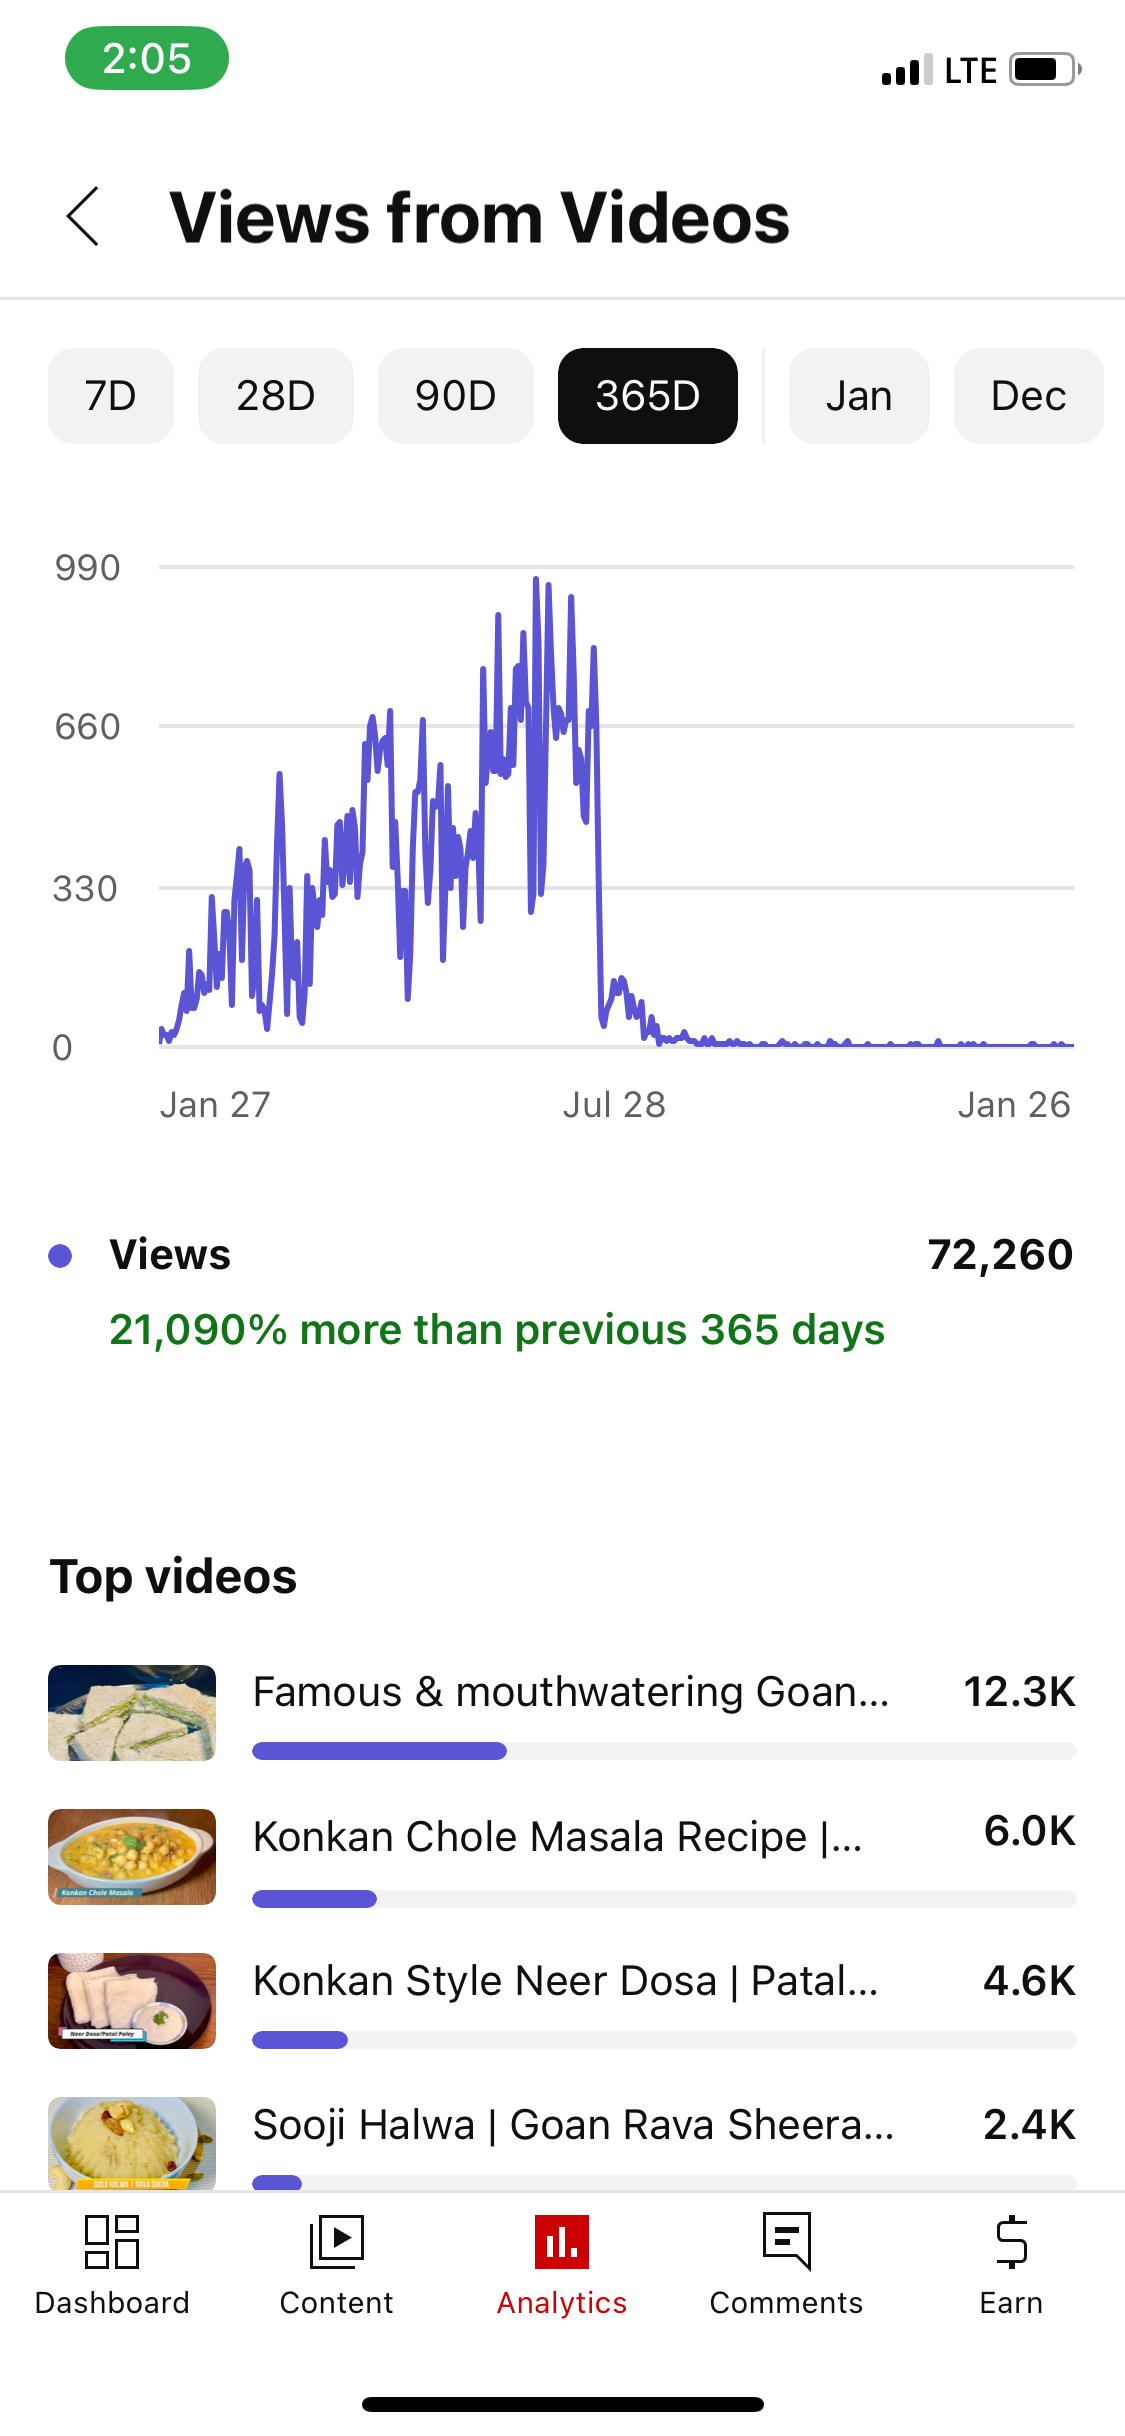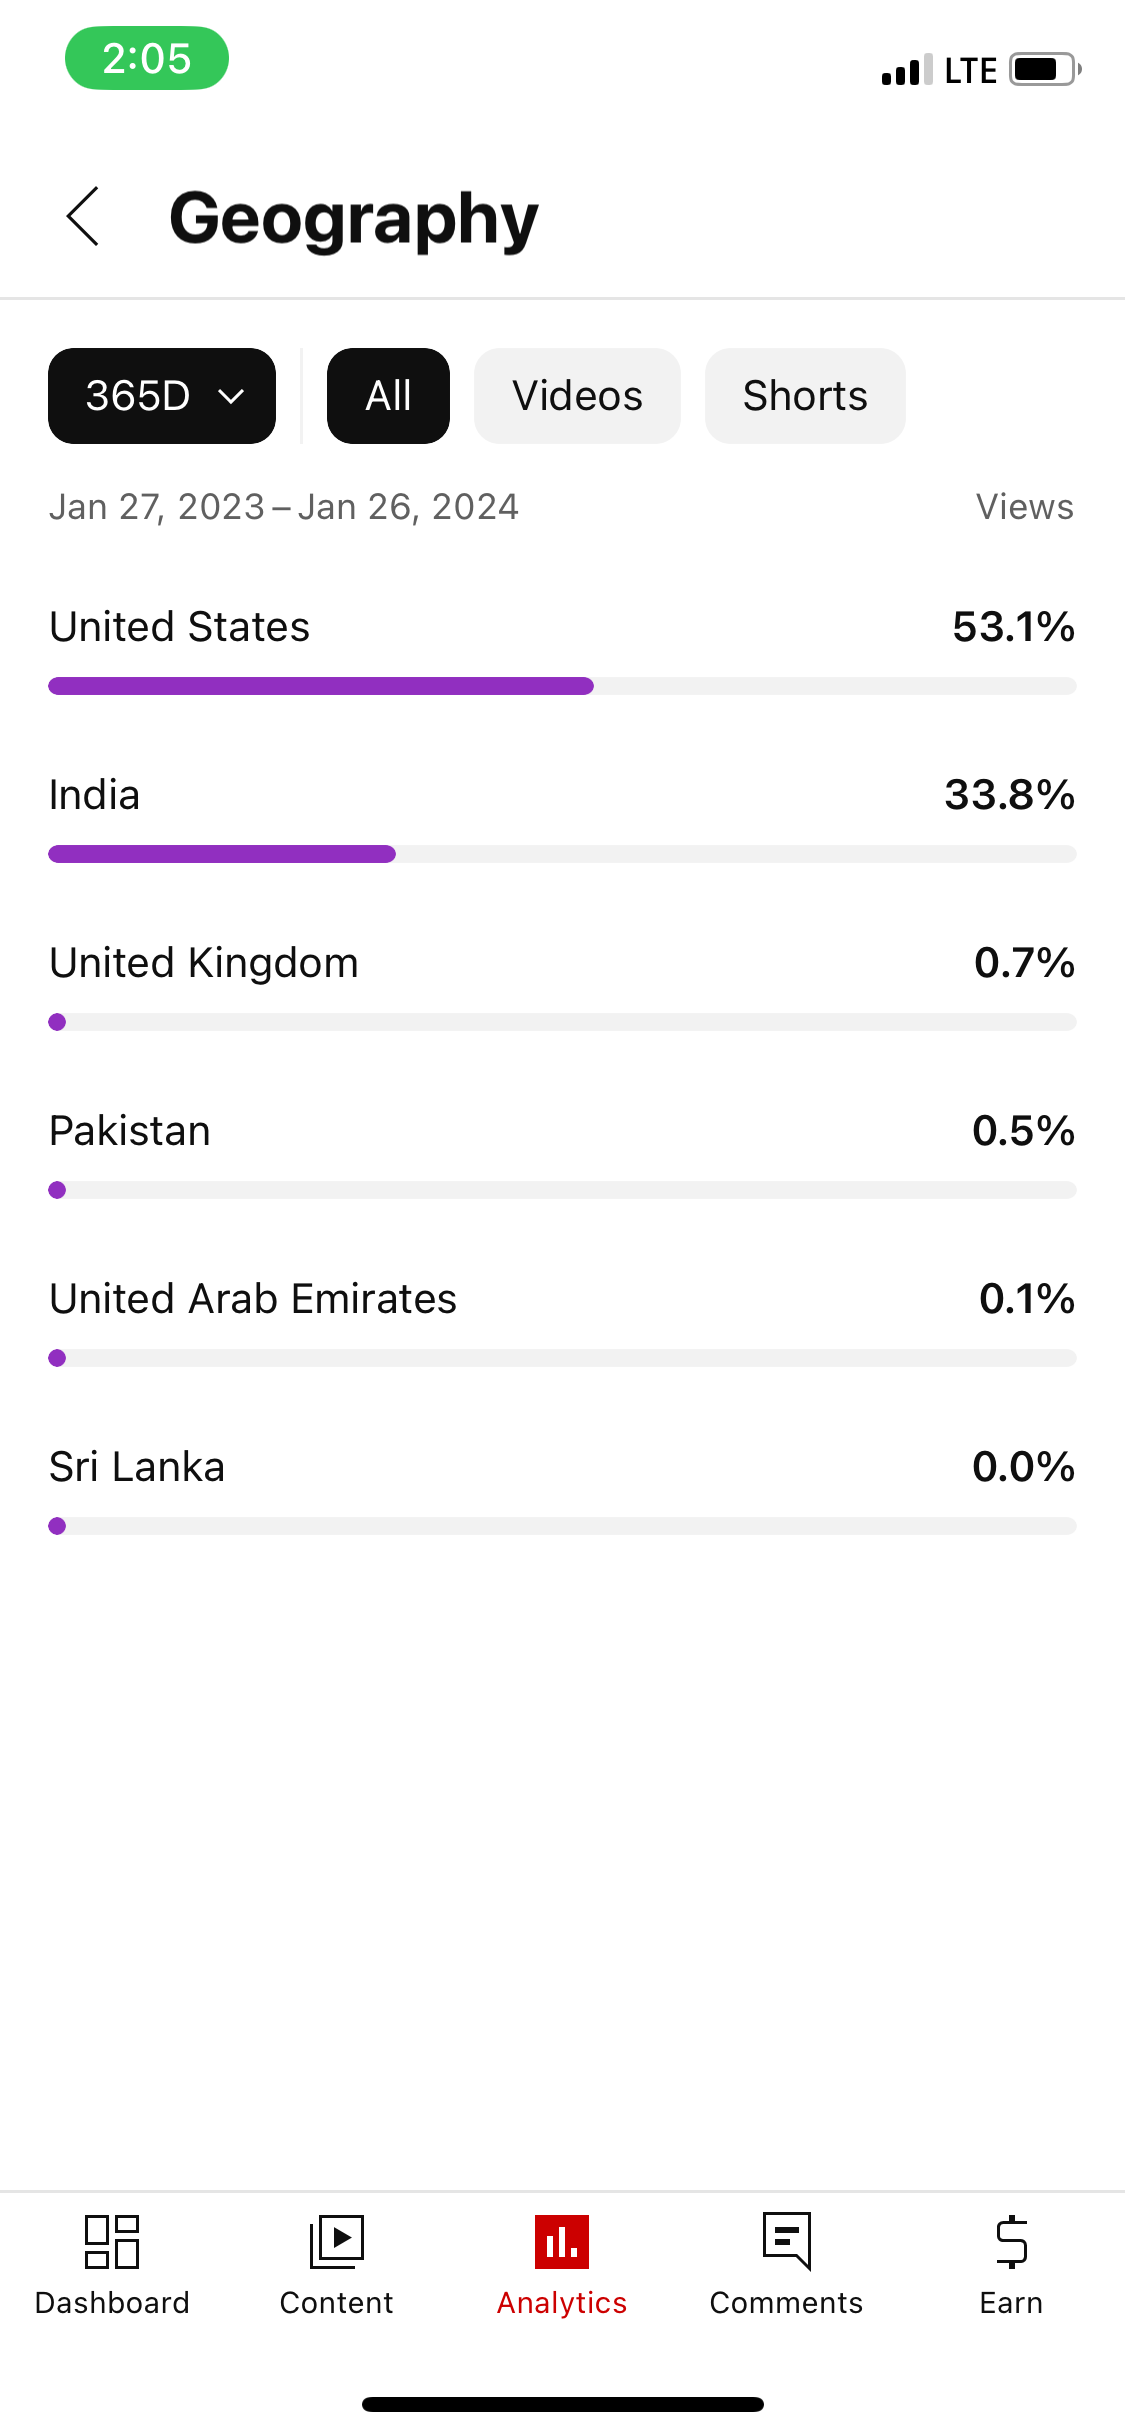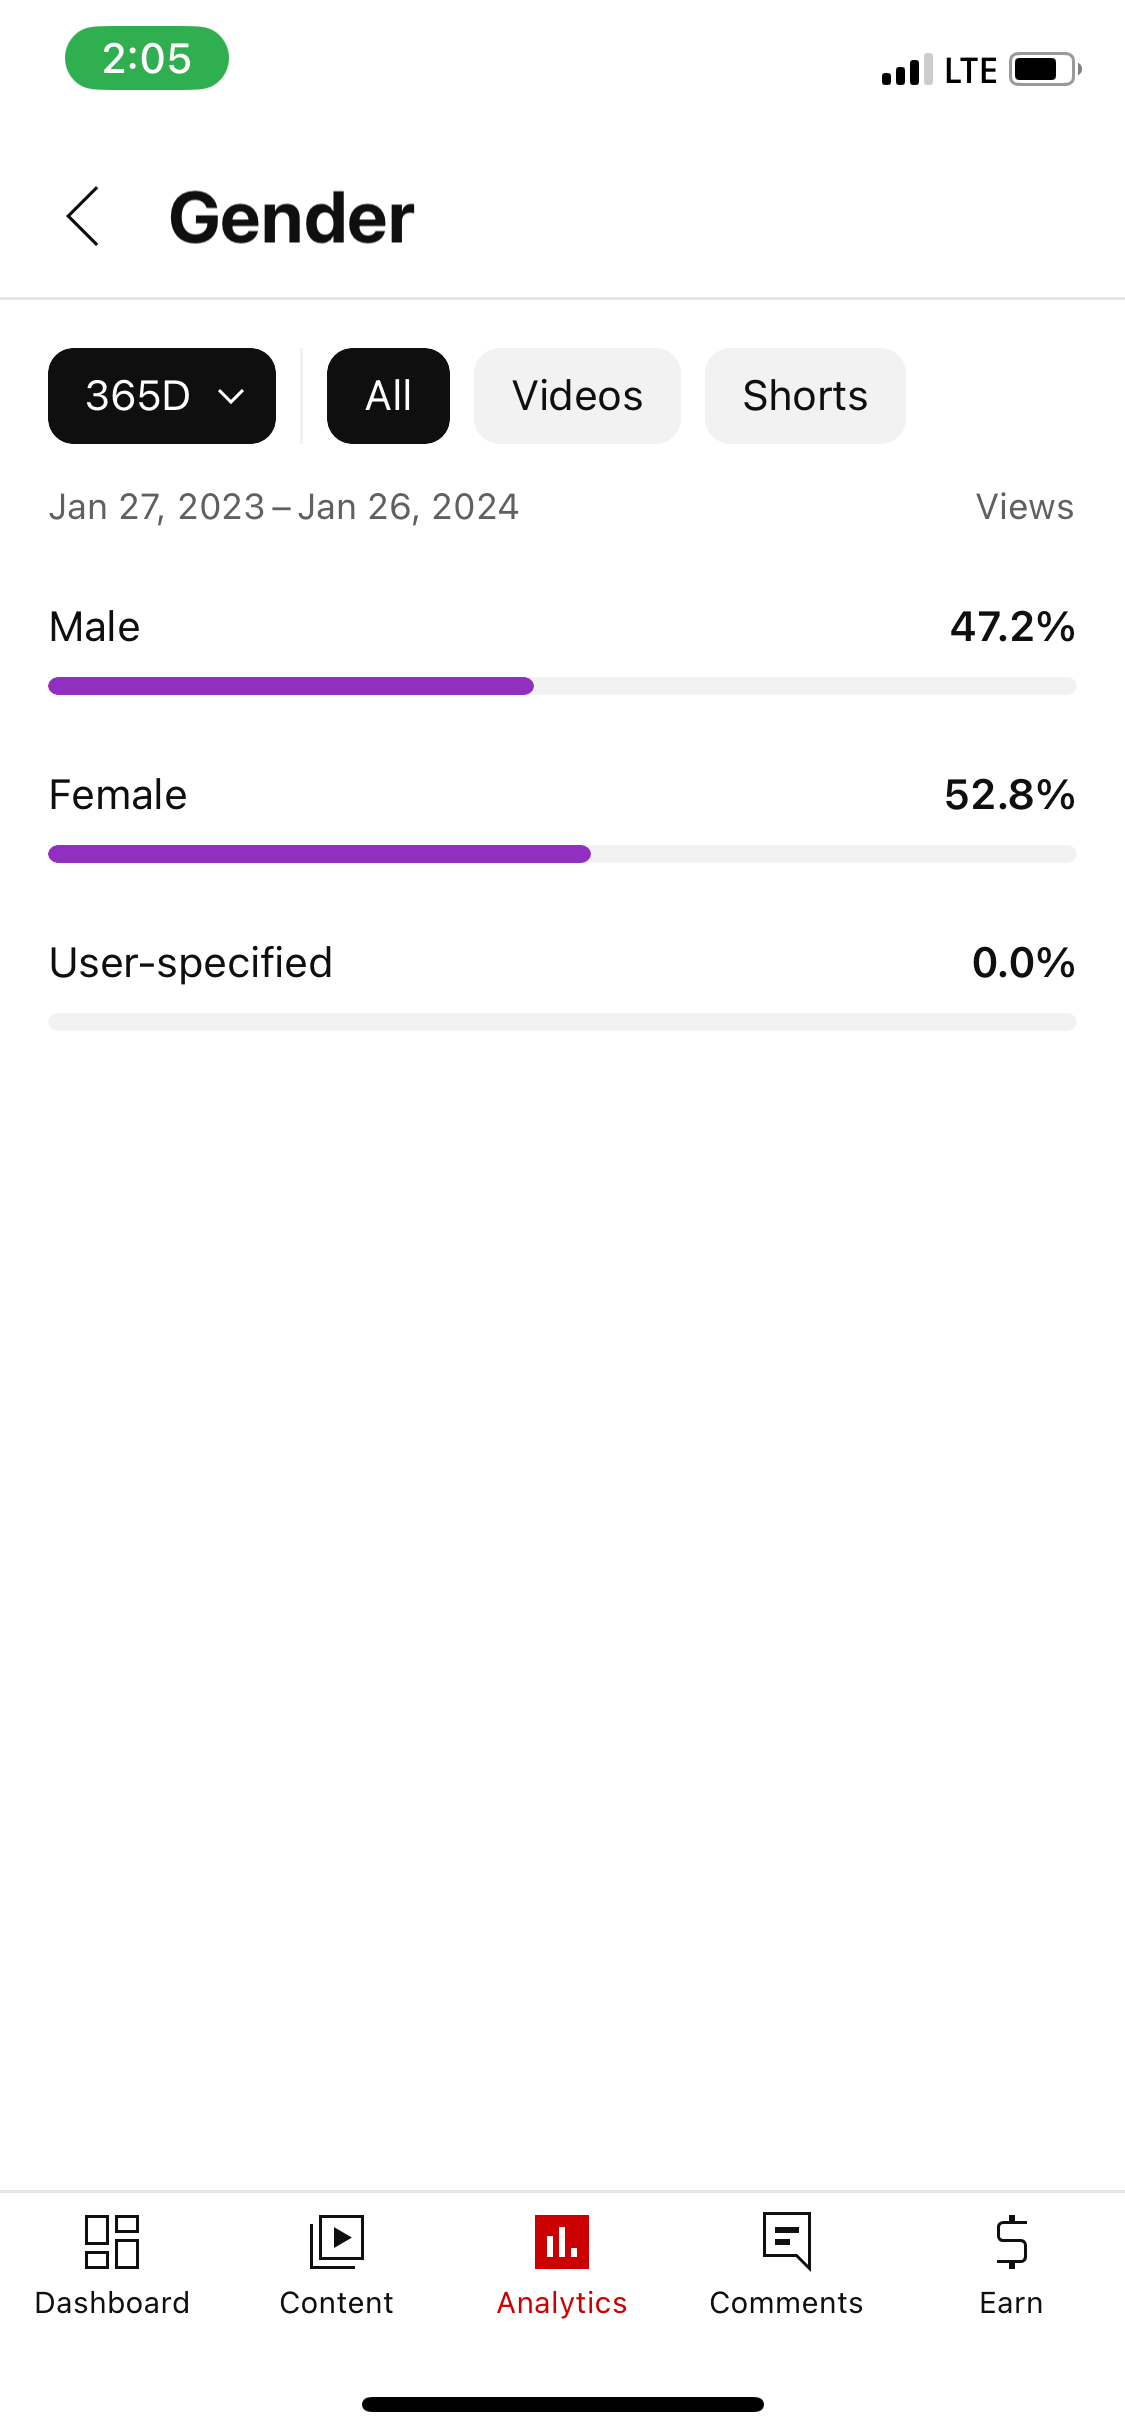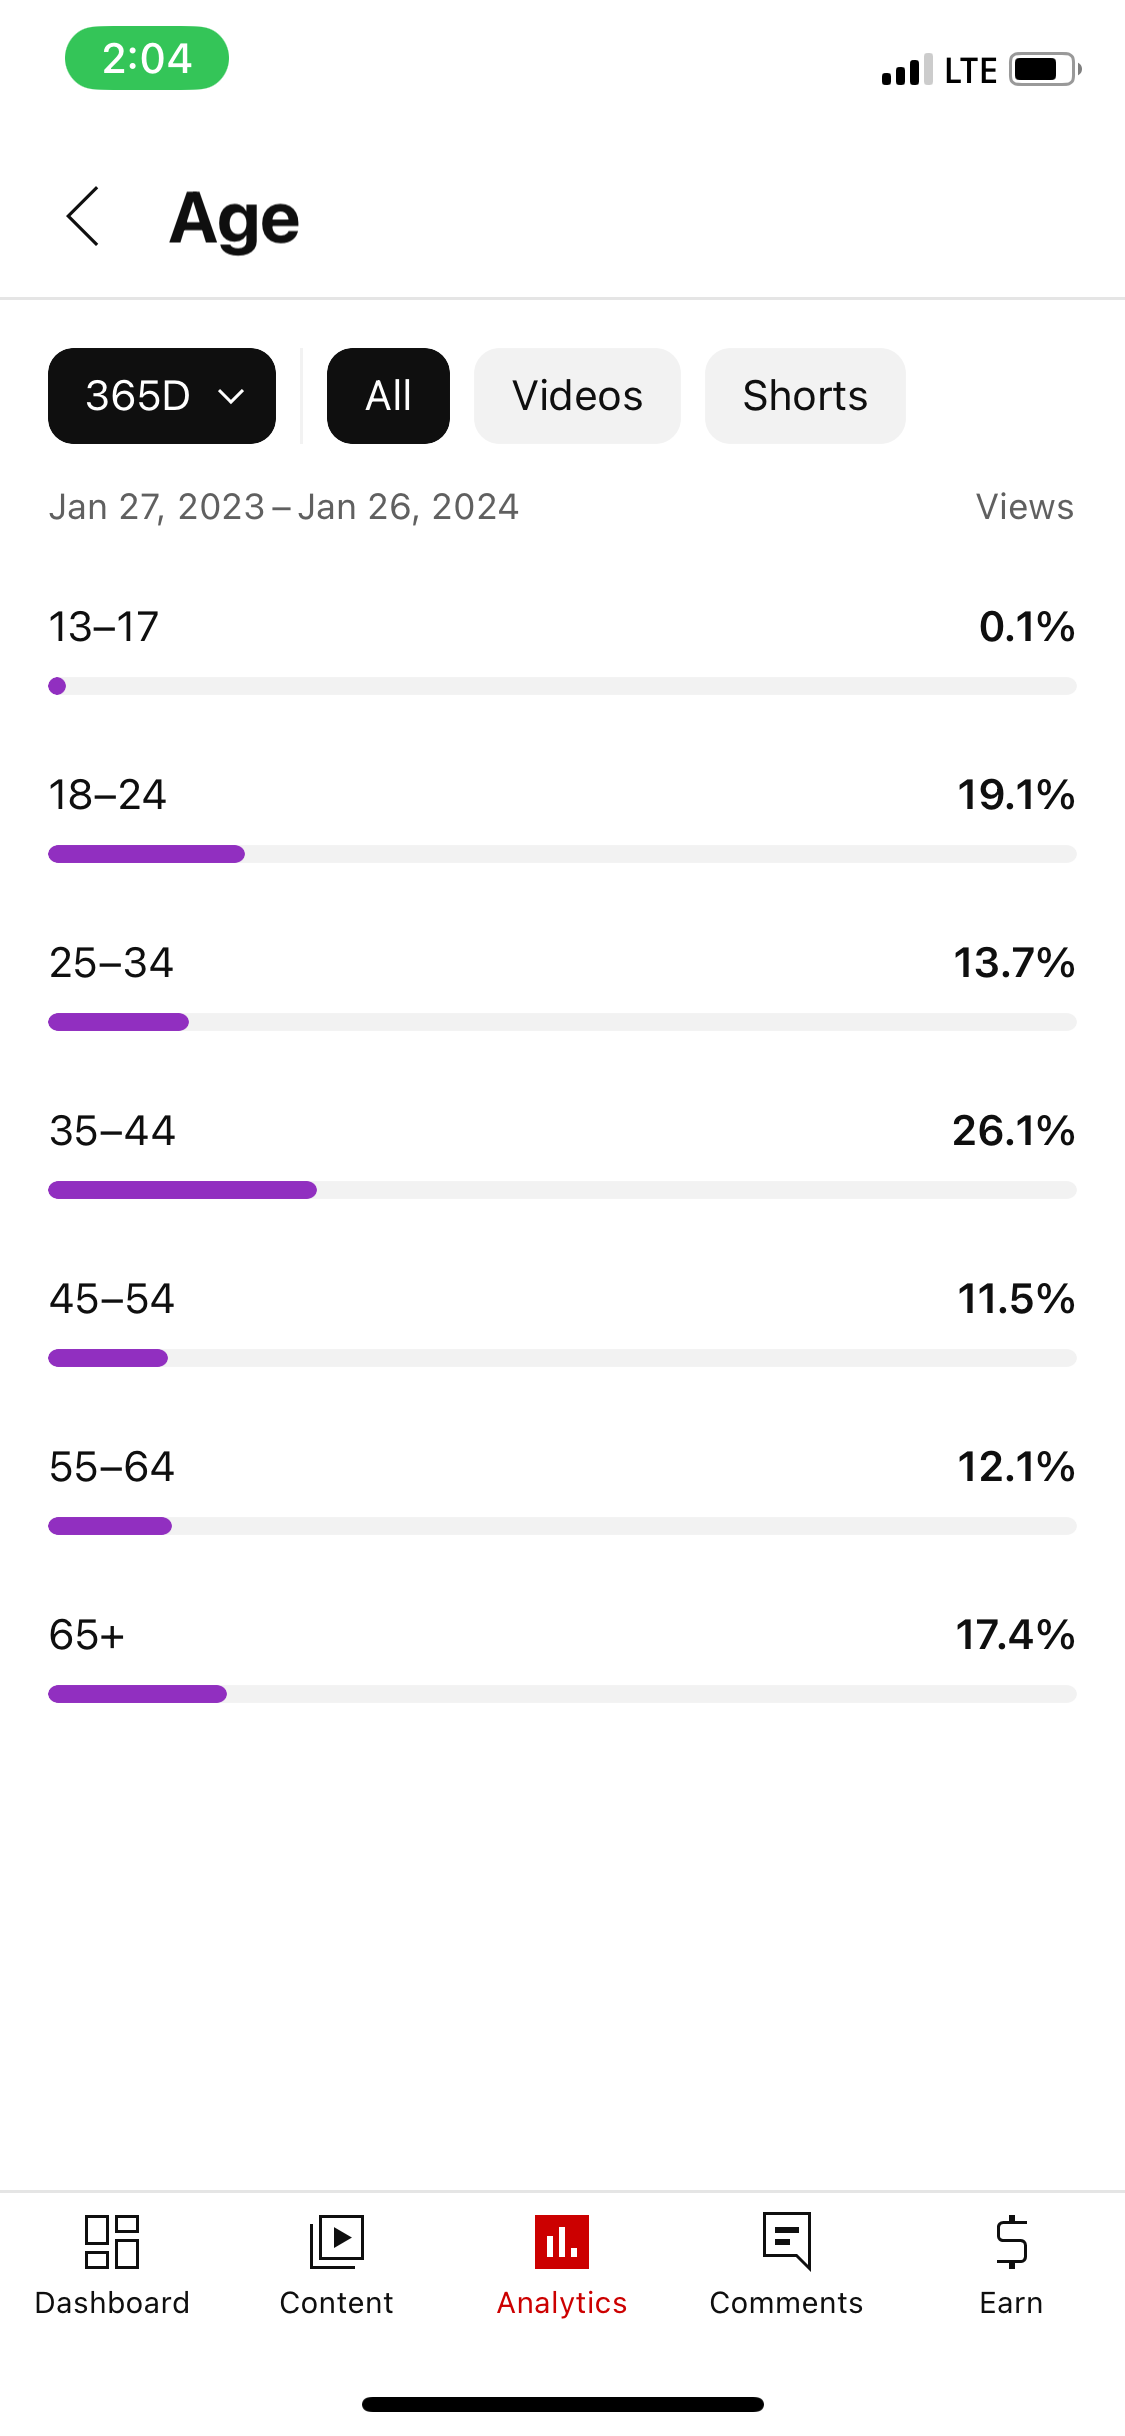




#Justify how the chosen segmentation and dimensionality reduction techniques can provide strategic insights in this scenario.

#KMeans:

**Advantages:**

Well-suited for spherical clusters, making it effective when clusters have a roughly equal number of members.
Easy to interpret and implement, providing clear boundaries for each cluster.

**Strategic Insights:**

Identifying well-defined clusters allows for targeted marketing strategies, as each cluster represents a distinct customer segment.
The centroids provide the average behavior of customers within each cluster, guiding product recommendations and promotional offers.

#Hierarchical Clustering:

**Advantages:**

Captures hierarchical relationships among clusters, allowing for a nuanced understanding of how different segments relate to each other.
Provides a dendrogram that visually represents cluster hierarchies.

**Strategic Insights:**

Reveals potential subgroupings within larger clusters, enabling the identification of niche markets or specialized customer preferences.
The dendrogram guides decision-makers in choosing the optimal number of clusters based on the desired granularity.

#DBSCAN:

**Advantages:**

Identifies clusters of arbitrary shapes, making it robust to irregularly shaped and density-based patterns.
Recognizes noise points that do not belong to any cluster.

**Strategic Insights:**

Unveils clusters that may not be spherical or well-separated, providing insights into less conventional customer segments.
The identification of noise points helps in recognizing outliers or customers with unique behaviors that may require specialized attention.
Chosen Dimensionality Reduction Technique: PCA

#Principal Component Analysis (PCA):
**Advantages:**

Reduces the dimensionality of the dataset while retaining as much variance as possible.
Highlights the most important features contributing to the variability in the data.

**Strategic Insights:**

Simplifies the interpretation of customer segments by representing them in a lower-dimensional space.
Identifies the most influential features, aiding in the creation of targeted marketing strategies focused on key variables.
Strategic Insights Gained:

**Clear Customer Segmentation:**

The chosen clustering techniques (KMeans, Hierarchical, and DBSCAN) provide clear and distinct segments, enabling the development of targeted marketing strategies for each group.
Strategic insights include understanding the needs, preferences, and behaviors of each segment, guiding personalized campaigns.

**Hierarchical Relationships:**

Hierarchical clustering reveals potential relationships and dependencies between clusters, assisting in identifying overarching patterns in customer behavior.
Strategic insights gained from hierarchical relationships can guide broader marketing strategies that span multiple customer segments.

**Identification of Outliers and Niche Markets:**

DBSCAN's ability to identify noise points helps in recognizing outliers or customers with unique behaviors.
Strategic insights involve addressing the needs of these outliers or recognizing potential niche markets that may not be apparent through traditional clustering.

**Focused Marketing Efforts:**

PCA allows for the reduction of dimensions while preserving variance, simplifying the interpretation of customer segments.
Strategic insights involve understanding which features contribute most to the variability, guiding the creation of focused and impactful marketing efforts.

*In summary, the chosen segmentation and dimensionality reduction techniques provide strategic insights by offering a comprehensive understanding of customer segments, their relationships, and the most influential features. This knowledge is essential for tailoring marketing strategies, enhancing customer experiences, and driving business growth.*

